# 4_Online_Store_Video_Game_Sales_Trends_Analysis

<a id='back'><a/>
# Table of Contents
    
- [1. Online Video Game Sales Trends Analysis Overview](#1)
- [2. General Information Review](#2)
- [3. Data Preprocessing](#3)
    - [3.1 Additional Calculations to Include](#3.1)
    - [3.2 Dropping or Filling in Missing Values](#3.2)
    - [3.3 Changing Data Types](#3.3)
    - [3.4 Duplicates](#3.4)
    - [3.5 Conclusion](#3.5)
- [4. Exploratory Data Analysis](#4)
    - [4.1 Game Sales by Year](#4.1)
    - [4.2 Game Sales by Platform](#4.2)
        - [4.2.1 Top 10 Platforms](#4.2.1)
        - [4.2.2 Sales Trends](#4.2.2)
        - [4.2.3 Same Game Sales Across Platforms](#4.2.3)
    - [4.3 Game Sales by Genre](#4.3)
    - [4.4 Game Sales by Region](#4.4)
        - [4.4.1 Regional Sales by Platform](#4.4.1)
        - [4.4.2 Regional Sales by Genre](#4.4.2)
        - [4.4.3 Regional Sales by ESRB](#4.4.3)
    - [4.5 Critic and User Scores Impact on Game Sales](#4.5)
        - [4.5.1 Critic Scores Impact](#4.5.1)
        - [4.5.2 User Scores Impact](#4.5.2)
    - [4.6 Conclusion](#4.6)
- [5. Hypothesis Testing](#5)
    - [5.1 Average User Ratings for Two Popular Platforms](#5.1)   
        - [5.1.1 Initial Statistical Review](#5.1.1)
        - [5.1.2 Assumptions Review](#5.1.2)
        - [5.1.3 Hypothesis Test](#5.1.3)
    - [5.2 Average User Ratings for Two Popular Genres](#5.2)
        - [5.2.1 Initial Statistical Review](#5.2.1)
        - [5.2.2 Assumptions Review](#5.2.2)
        - [5.2.3 Hypothesis Test](#5.2.3)
    - [5.3 Conclusion](#5.3)
- [6. General Conclusion](#6)

<a id='1'><a/>
# 1 Online Video Game Sales Trends Analysis Overview
[Return to Table of Contents](#back)

*Ice* is an online store that sells video games globally. To assist in the planning of the company's 2017 advertising campaign, *Ice* has asked that we perform an analysis to identify patterns in open source data of successful games. For this study, we will utilize user and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales from 1980-2016 to spot potential big winners and thus inform our advertising campaigns. To perform this analysis, we will complete the following:
<ul>
    <li>General Information Review</li>
    <li>Data Preprocessing</li>
    <li>Exploratory Data Analysis</li>
    <li>Hypothesis Testing</li>
</ul>
At the end of our study, we will provide a General Conclusion of our findings of the above and a recommendation for the company's 2017 advertising campaign.

<a id='2'><a/>
# 2 General Information Overview
[Return to Table of Contents](#back)

In [1]:
# import libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
from scipy import stats as st
from scipy.stats import levene
import seaborn as sns
import matplotlib.ticker as mtick

In [2]:
# read all input data

try: # local path
    df= pd.read_csv('games.csv')
except: # server path
    df= pd.read_csv('/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.columns = df.columns.str.lower()

In [5]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 5.6 MB


In [7]:
for c in df.select_dtypes(include='object').columns:
    print(c)
    print(df[c].value_counts())

name
Need for Speed: Most Wanted                   12
Ratatouille                                    9
Madden NFL 07                                  9
FIFA 14                                        9
LEGO Marvel Super Heroes                       9
                                              ..
The $1 Pyramid                                 1
Heathcliff! Frantic Foto                       1
Ghosts 'n Goblins                              1
Wing Island                                    1
The Legend of Zelda: A Link Between Worlds     1
Name: name, Length: 11559, dtype: int64
platform
PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name

**General Information Key Points:**
<ul>
    <li>There are 16,715 rows, or games, presented in the data </li>
    <li>There are rows six with missing values, three of which have nearly 50% of values missing</li>
    <li>Several data types will need to be converted: 'year_of_release', 'genre', 'user_score</li>
    <li>Looking at the mean and quartile distributions of 'year_of_release', most games in this file were released starting in the mid-2000s. For 'critic_score' (which we know has a maximum of 100), standard deviation is considerably high, meaning that there is high variability. However, our quartile distribution indicates most games are rated 70% or above</li>
    <li>We could consolidate the 'rating' subgenres as there are a few with very small numbers (though may not be necessary for this analysis). For the remaining genres / subgenres, there is no need to consolidate</li>
    <li>'User_score' has an item, "tbd" that is creating a mixed data type in this column, which we will need to explore further
    </ul>

<a id='3'><a/>
# 3 Data Preprocessing
[Return to Table of Contents](#back)

<a id='3.1'><a/>
## 3.1 Additional Calculations to Include
[Return to Table of Contents](#back)

In [8]:
# creating a separate series consolidating global sales figures 

df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

<a id='3.2'><a/>
## 3.2 Droping or Filling in Missing Values and Faulty Data
[Return to Table of Contents](#back)

In [9]:
# missing values as numbers

df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
total_sales           0
dtype: int64

In [10]:
# missing values as a percentage of the entire dataset

round(df.isnull().sum() / len(df),4)*100

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         40.09
rating             40.48
total_sales         0.00
dtype: float64

<a id='3.2.1'><a/>
### 3.2.1 Series 'name', 'genre' and 'year_of_release'
[Return to Table of Contents](#back)

The null values in the series 'name' and 'genre' should be deleted as they are so small as to be inconsequential for our analysis. That they are missing is likely the result of some data collection error. For 'year_of_release', the percentage of missing values is also small (1.6%) and their removal from our data. In addition, it would be difficult to fill these missing values with a non-arbitrary 'year_of_release' based on the data provided.

In [11]:
# dropping nulls found in series 'name','genre','year_of_release'

df.dropna(subset=['name','genre','year_of_release'],inplace=True)

<a id='3.2.2'><a/>
### 3.2.2 Tbd's in 'User_Score'
[Return to Table of Contents](#back)

In [12]:
# we noted above that user_score has a "tbd" value that
# to begin, we will isolate user_score's that contain "tbd"

user_score_tbd = df.query('user_score == "tbd"')

In [13]:
# a test to see if anything jumps out to explain why we would have "tbd" values in the 'user_score'

for c in user_score_tbd.select_dtypes(include='object').columns:
    print(c)
    print(user_score_tbd[c].value_counts())

name
Just Dance 2017                                   5
Ben 10 Galactic Racing                            5
Rapala Pro Bass Fishing 2010                      5
Bakugan Battle Brawlers: Defenders of the Core    5
DreamWorks Super Star Kartz                       5
                                                 ..
Indianapolis 500 Legends                          1
FIFA Soccer 06                                    1
Ms. Pac-Man Maze Madness                          1
Konductra                                         1
The Smurfs: Dance Party                           1
Name: name, Length: 1903, dtype: int64
platform
DS      744
Wii     428
GBA     258
PS2     236
XB      146
PSP     118
GC      100
PS3      87
X360     83
3DS      54
PC       49
PS       44
XOne     11
PSV       7
PS4       6
WiiU      5
Name: platform, dtype: int64
genre
Misc            440
Sports          406
Action          368
Simulation      233
Racing          229
Puzzle          208
Adventure       156
Platform

In [14]:
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [15]:
# percentage of "E" rating (which already includes all "DS" platform games) that contain "tbd" as a user_score

(print("'E' ratings as a percentage of tbds:","{:.1%}".format(round(len(user_score_tbd.query('rating == "E"'))
        / len(user_score_tbd),2))))

'E' ratings as a percentage of tbds: 65.0%


In [16]:
(print("'E' ratings as a percentage of tbds:","{:.1%}".format(round(len(df.query('rating == "E"'))
        / len(df),2))))

'E' ratings as a percentage of tbds: 24.0%


65% of the "tbd"s in the 'user_score' series have an "E" rating, indicating that players are likely younger and less likely to provide scores or players are not serious gamers who would also be less likely to take some kind of survey. The titles of these games also seem to be family friendly / directed at a younger audience, giving further credence to this theory. There is nothing we can gleam from the data as to what these ratings would be with which to replace the tbd's so we will replace them with nulls

In [17]:
# replacing the tbd's with nulls

df['user_score'] = pd.to_numeric(df['user_score'].replace('tbd',np.nan))

<a id='3.2.3'><a/>
### 3.2.3 Series 'critic_score', 'user_score' and 'rating'
[Return to Table of Contents](#back)

The null values in the series 'critic_score', 'user_score' and 'rating' cannot be deleted as they would represent a loss of >40% of our available data. We hypothesize that this information is missing for older / unpopular games. Given that our study is focused on the best selling games, the absence of this information would not greatly impact the results of our study (if our hypothesis is true). We will examine this below.

In [18]:
df_user_score_not_null = df[df['user_score'].notnull()]
df_user_score_null = df[df['user_score'].isnull()]

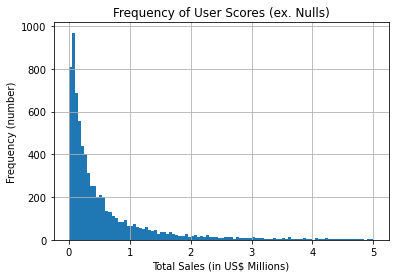

In [19]:
df_user_score_not_null['total_sales'].hist(bins=100, range=[0, 5])

plt.title('Frequency of User Scores (ex. Nulls)')
plt.xlabel('Total Sales (in US$ Millions)')
plt.ylabel('Frequency (number)')

plt.show()

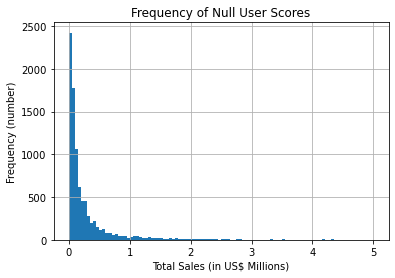

In [20]:
df_user_score_null['total_sales'].hist(bins=100, range=[0,5])

plt.title('Frequency of Null User Scores')
plt.xlabel('Total Sales (in US$ Millions)')
plt.ylabel('Frequency (number)')

plt.show()

In [21]:
# only the rows that are NOT misssing

df_critic_score_not_null = df[df['critic_score'].notnull()]
df_critic_score_null = df[df['critic_score'].isnull()]

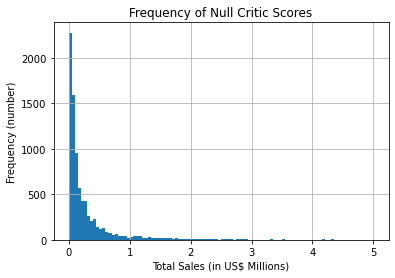

In [22]:
df_critic_score_null['total_sales'].hist(bins=100, range=[0,5])

plt.title('Frequency of Null Critic Scores')
plt.xlabel('Total Sales (in US$ Millions)')
plt.ylabel('Frequency (number)')

plt.show()

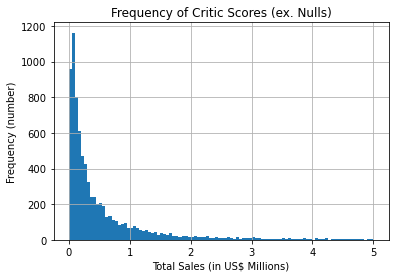

In [23]:
df_critic_score_not_null['total_sales'].hist(bins=100, range=[0, 5])

plt.title('Frequency of Critic Scores (ex. Nulls)')
plt.xlabel('Total Sales (in US$ Millions)')
plt.ylabel('Frequency (number)')

plt.show()

Null critic scores appear to occur more frequently for games with lower total sales.

**How to Proceed with Missing Values for Critic_Score, User_Score and Rating:**
<ul>

For 'critic_score' and 'user_score, we can fill in the missing values for each based on games that have the same name (but appear on more than one platform). It is important to note though that this narrow parameter will fill in few missing values. Given that we will still have a high number of missing values we tested if they were random, which we determined they were not. The histograms confirm this: unpopular or old games (those with fewer sales) were more likely to not have a critic or user score. As such, our options are to 1) either drop these lines from our analysis (since our focus is on top selling games and this won't impact our study) or 2) we could just leave them as NaNs to preserve the rest of the data. We will leave them.
<br/>
<br/>
'Rating' cannot be filled based on the information provided and so we will fill in the missing values with "unknown".

In [24]:
df['critic_score'].fillna(df.groupby(['name'])['critic_score'].transform('first'), inplace=True)

In [25]:
df['user_score'].fillna(df.groupby(['name'])['user_score'].transform('first'), inplace=True)

In [26]:
df['rating'] = df.rating.fillna('undefined')

In [27]:
df.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7522
user_score         7920
rating                0
total_sales           0
dtype: int64

<a id='3.3'><a/>
## 3.3 Changing Data Types
[Return to Table of Contents](#back)

The following series' data types should be converted:
<ul>
<li>year_of_release --> int (years are represented as whole integers)</li>
<li>genre --> category (there is a set number of gaming genres) </li>
<li>user_score --> float (this is a categorical variable - we completed this in the previous section while handling the tbd's</li>
    </ul>

In [28]:
df['year_of_release'] = df['year_of_release'].astype('int')
df['genre'] = df['genre'].astype('category')

<a id='3.4'><a/>
## 3.4 Duplicates
[Return to Table of Contents](#back)

In [29]:
# check for duplicates in the dataset, of which there are none

df.duplicated().sum()

0

<a id='3.5'><a/>
## 3.5 Conclusion
[Return to Table of Contents](#back)

We were provided with one file for this analysis. The data was generally clean (i.e. no duplicates, not many category or formatting changes) so preprocessing was minimal in that regard. It is however important to note that there were a significant number of missing values in the series 'critic_score', 'user_score', and 'rating'. For rating, these were replaced with "unknown". For 'critic_score' and 'user_score', most of these were not able to be filled, though some were based on games that have the same name. However, after conduscting several tests, we determined that unpopular or old games (those with fewer sales) were more likely to not have a critic or user score. As such, the fact that this data is missing will not impact our analysis which is focused on higher performers. The lines with missing values in these two series were left.

<a id='4'><a/>
# 4 Exploratory Data Analysis
[Return to Table of Contents](#back)

As part of our data analysis, we will examine the following:
<ul>
    <li>4.1 Game Sales by Year</li>
    <li>4.2 Game Sales by Platform</li>
    <li>4.3 Game Sales by Genre</li>
    <li>4.4 Game Sales by Region</li>
    <li>4.5 Critic and User Reviews Impact on Game Sales</li>

<a id='4.1'><a/>
## 4.1 Game Sales by Year
[Return to Table of Contents](#back)

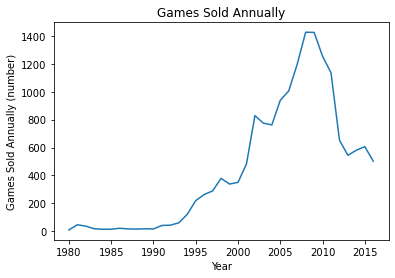

In [30]:
df.groupby('year_of_release').name.count().plot()

plt.title('Games Sold Annually')
plt.xlabel('Year')
plt.ylabel('Games Sold Annually (number)')

plt.show()

The data that we have ranges from 1980 to 2016. Growth experienced three major points of inflection: 1993, 2000 and 2004. Since 2010, there has been a significant drop-off in annual game sales. 

<a id='4.2'><a/>
## 4.2 Game Sales By Platform
[Return to Table of Contents](#back)

<a id='4.2.1'><a/>
### 4.2.1 Top 10 Platorms
[Return to Table of Contents](#back)

In [31]:
df_platform = df.groupby(['year_of_release','platform'])['total_sales'].sum().unstack(1)

In [32]:
# only using the top 10 platforms by total global sales

top_platforms = df_platform.sum().sort_values().index[-10:]

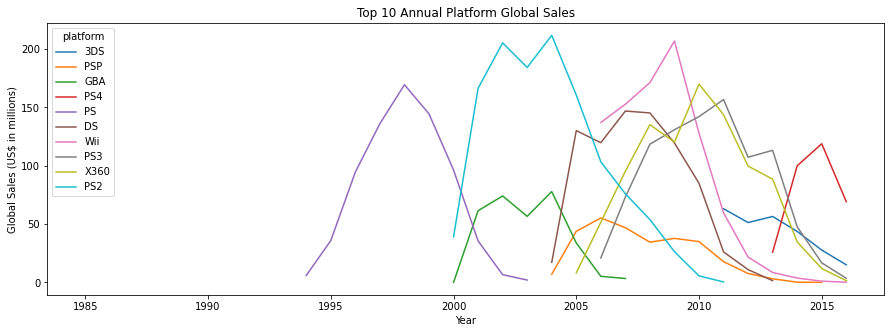

In [33]:
df_platform[top_platforms].plot(figsize=(15, 5))

plt.title('Top 10 Annual Platform Global Sales')
plt.xlabel('Year')
plt.ylabel('Global Sales (US$ in millions)')

plt.show()

In [34]:
# active years

(-df_platform[top_platforms].isnull()).sum()

platform
3DS      6
PSP     12
GBA      8
PS4      4
PS      10
DS      11
Wii     11
PS3     11
X360    12
PS2     12
dtype: int64

The top platforms generally have a lifecycle that lasts 11-12 years, but as we can see above, platform sales are relevant for a much shorter period, meaning that sales quickly peak and begin to fall. This occurs within 3-4 years of a platform being launched. Given that our last year with data is 2016, we should exclude data before 2012 (i.e. 2016-4)

In [35]:
df = df[df.year_of_release>=2012]

<a id='4.2.2'><a/>
### 4.2.2 Sales Trends
[Return to Table of Contents](#back)

In [36]:
# a look at total sales figures

df.groupby(['year_of_release','platform']).total_sales.sum().unstack(1)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


In [37]:
# a look at the change in total sales figures year-over-year

df.groupby(['year_of_release','platform']).total_sales.sum().unstack(1).diff(axis=0)

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,5.21,-9.47,-10.84,5.89,NaN,-4.55,-5.60,-13.12,4.09,-11.16,NaN
2014,-12.81,NaN,0.90,-65.49,74.01,-2.90,1.31,-4.84,0.38,-53.84,35.11
2015,-15.98,NaN,-4.76,-30.94,18.90,-0.12,-5.65,-2.61,-5.68,-22.78,6.07
2016,-12.64,NaN,-3.27,-13.22,-49.65,NaN,-2.00,-0.96,-11.75,-10.44,-33.99


The 2016 leaders in total sales were:
<br> 1) PS4 (69.25 million) <br> 2) XOne (26.15 million) <br> 3) 3DS (15.14 million)

From the data, we can see that platforms sales cease to grow once they have been in the market for a couple of years. As none of the platforms above are in their first or second year on the market, we can see that all are in decline by 2016.

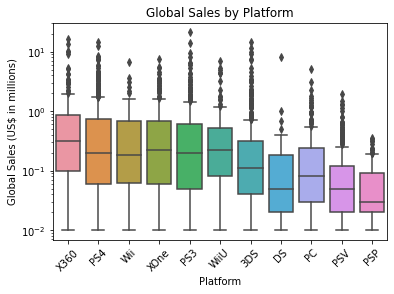

In [38]:
my_order = df.groupby(['platform'])['total_sales'].mean().sort_values().iloc[::-1].index

sns.boxplot(x="platform", y="total_sales", data=df, order=my_order)
plt.yscale('log')

plt.title('Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales (US$ in millions)')
plt.xticks(rotation=45)

plt.show()

Global sales appear to have a fairly symmetrical distribution around the mean across the various platforms, implying that global sales' mean and the median are about the same for any given platform. Sales amongst the platforms differs significantly. Games on new platforms (e.g. PS3, PS4, Xbox, Wii) tend to have higher average sales. It is also interesting to note that games on handheld devices (e.g. PSP, PSV) and desktops (i.e. PC) tend to underperform in sales.

<a id='4.2.3'><a/>
### 4.2.3 Same Game Sales Across Platforms
[Return to Table of Contents](#back)

In [39]:
# separating out same games that appear across multiple platforms from the dataset

game_df = df.groupby(['name']).filter(lambda x: x['platform'].count() >= 2.).groupby(['name', 'platform']).total_sales.sum().unstack(1)
game_df

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,,,
Frozen: Olaf's Quest,0.59,0.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014 FIFA World Cup Brazil,NaN,NaN,NaN,0.61,NaN,NaN,NaN,NaN,NaN,0.43,NaN
3rd Super Robot Wars Z Jigoku Hen,NaN,NaN,NaN,0.23,NaN,NaN,0.19,NaN,NaN,NaN,NaN
3rd Super Robot Wars Z: Tengoku-Hen,NaN,NaN,NaN,0.15,NaN,NaN,0.19,NaN,NaN,NaN,NaN
7 Days to Die,NaN,NaN,NaN,NaN,0.14,NaN,NaN,NaN,NaN,NaN,0.05
...,...,...,...,...,...,...,...,...,...,...,...
Zone of the Enders HD Collection,NaN,NaN,NaN,0.42,NaN,NaN,NaN,NaN,NaN,0.20,NaN
Zoo Tycoon (2013),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09,0.36
Zumba Fitness Core,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07,NaN,0.05,NaN


<AxesSubplot:>

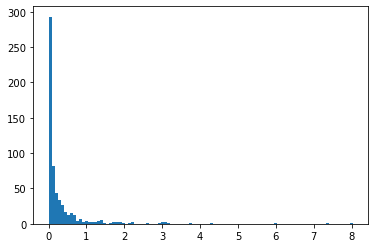

In [40]:
# for any given game, variation across platforms

game_df.std(1).hist(bins=100, grid=False)

In [41]:
game_df.std(1).sort_values()

name
Brave: The Video Game                        0.000000
Kyokugen Dasshutsu ADV: Zennin Shiboudesu    0.000000
Atari Flashback Classics: Volume 2           0.000000
Mark McMorris Infinite Air                   0.000000
Rabbids Invasion: The Interactive TV Show    0.000000
                                               ...   
Star Wars Battlefront (2015)                 3.731385
Call of Duty: Ghosts                         4.271434
Call of Duty: Black Ops 3                    5.972289
Call of Duty: Black Ops II                   7.386813
Grand Theft Auto V                           8.032906
Length: 596, dtype: float64

In [42]:
game_df.loc[game_df.std(1).sort_values().index[0:10]]

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,,,
Brave: The Video Game,NaN,0.01,NaN,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN
Kyokugen Dasshutsu ADV: Zennin Shiboudesu,0.03,NaN,NaN,NaN,NaN,NaN,0.03,NaN,NaN,NaN,NaN
Atari Flashback Classics: Volume 2,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,0.02
Mark McMorris Infinite Air,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,0.01
Rabbids Invasion: The Interactive TV Show,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,NaN,0.01
Sakura-Sou no Pet na Kanojo,NaN,NaN,NaN,NaN,NaN,0.01,0.01,NaN,NaN,NaN,NaN
JoJo's Bizarre Adventure: Eyes of Heaven,NaN,NaN,NaN,0.03,0.03,NaN,NaN,NaN,NaN,NaN,NaN
Winning Post 8 2015,NaN,NaN,NaN,0.02,NaN,NaN,0.02,NaN,NaN,NaN,NaN
Scribblenauts Unmasked: A DC Comics Adventure,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,NaN,NaN


low sales to begin with. games on multiple platforms with lower standard deviation sales and lower sales games in general

In [43]:
game_df.loc[game_df.std(1).sort_values().index[-10:]]

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,,,
Minecraft,NaN,NaN,NaN,5.27,4.32,NaN,1.96,NaN,0.67,9.18,2.76
Assassin's Creed III,NaN,NaN,0.93,6.44,NaN,NaN,NaN,NaN,0.35,5.29,NaN
Just Dance 4,NaN,NaN,NaN,0.43,NaN,NaN,NaN,6.76,0.37,1.18,NaN
FIFA 17,NaN,NaN,0.12,0.73,7.60,NaN,NaN,NaN,NaN,0.38,2.65
FIFA 16,NaN,NaN,0.20,2.70,8.58,NaN,NaN,NaN,NaN,1.57,3.25
Star Wars Battlefront (2015),NaN,NaN,0.55,NaN,7.98,NaN,NaN,NaN,NaN,NaN,3.66
Call of Duty: Ghosts,NaN,NaN,0.69,9.36,3.83,NaN,NaN,NaN,0.35,10.24,2.92
Call of Duty: Black Ops 3,NaN,NaN,0.26,1.69,14.63,NaN,NaN,NaN,NaN,1.70,7.39
Call of Duty: Black Ops II,NaN,NaN,1.52,13.79,NaN,NaN,NaN,NaN,0.41,13.68,NaN


popular games on platforms that are dying out. As new platforms take over, these games aren't going to be as popular as previous ones. 

Many games where the difference in sales across platforms is small. Some games that have variation across platforms.

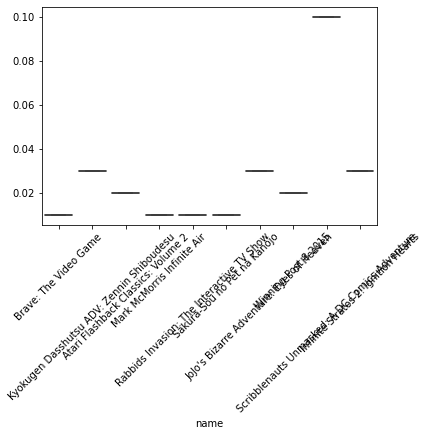

In [44]:
sns.boxplot(data=game_df.loc[game_df.std(1).sort_values().index[0:10]].transpose())
plt.xticks(rotation=45)
plt.show()

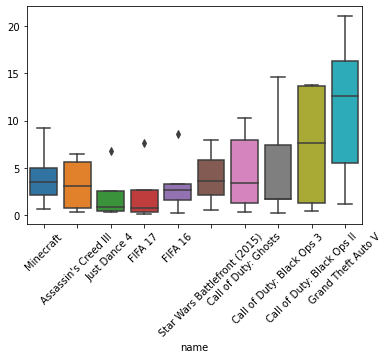

In [45]:
sns.boxplot(data=game_df.loc[game_df.std(1).sort_values().index[-10:]].transpose())
plt.xticks(rotation=45)
plt.show()

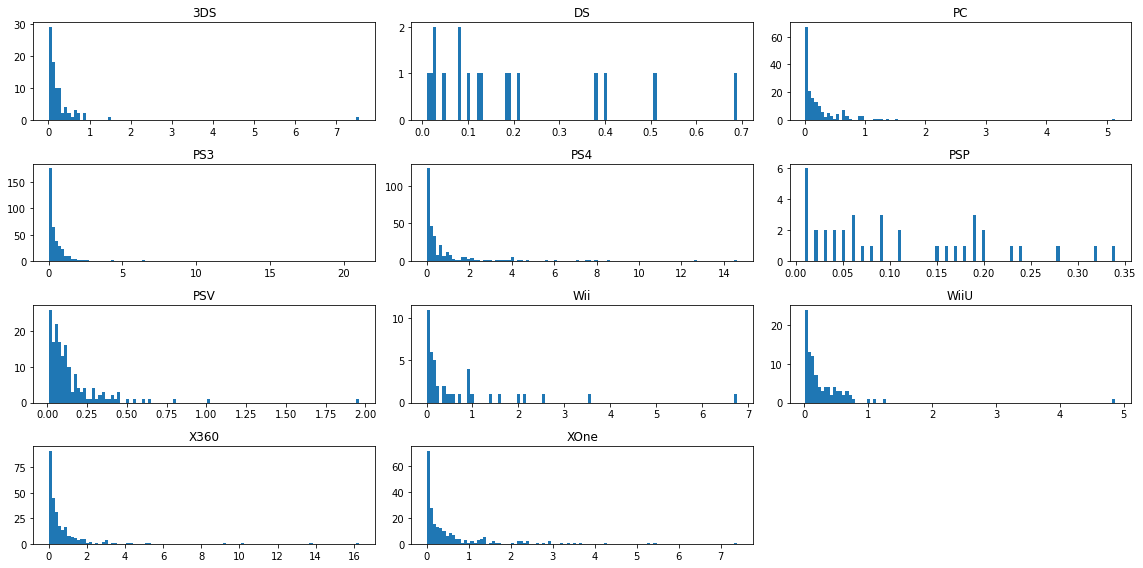

In [46]:
game_df.hist(bins=100, figsize=(16,8), grid=False)

plt.tight_layout()
plt.show()

Games are sold across a variety of platforms. Excluding platforms with lower sales (i.e. DS, PSP and PSV), the data is positively skewed. Games tend to be sold on fewer platforms than for platforms with lower sales.

<a id='4.3'><a/>
## 4.3 Game Sales by Genre
[Return to Table of Contents](#back)

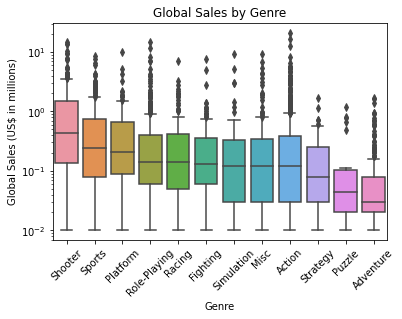

In [47]:
my_order_3 = df.groupby(['genre'])['total_sales'].median().sort_values().iloc[::-1].index

sns.boxplot(data=df, x ='genre', y='total_sales', order=my_order_3)
plt.yscale('log')
plt.xticks(rotation=45)

plt.title('Global Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Global Sales (US$ in millions)')
plt.xticks(rotation=45)

plt.show()

The largest games by sales are Shooter, followed by Action, Fighting, Racing and Sports. The genres with lower sales are Strategy, Puzzle and Adventure. The last three are characterized by their lack of "action", meaning that games with more action or movement have higher sales. Most distributions are failry symmetrical around the mean with clear exception of adventure where there more data points above the mean (meaning the distribution is skewed to the right and the median is higher).

<a id='4.4'><a/>
## 4.4 Game Sales by Region
[Return to Table of Contents](#back)

<a id='4.4.1'><a/>
### 4.4.1 Regional Sales by Platform
[Return to Table of Contents](#back)

In [48]:
platform_sales = df.groupby('platform')[['na_sales','eu_sales','jp_sales','other_sales']].sum()

In [89]:
platform_sales.divide(platform_sales.sum(1),0)

,na_sales,eu_sales,jp_sales,other_sales
platform,,,,
3DS,0.284209,0.219105,0.451107,0.045578
DS,0.365737,0.281275,0.296414,0.056574
PC,0.305188,0.602713,0.000000,0.092099
PS3,0.357976,0.370027,0.122200,0.149797
PS4,0.346151,0.449131,0.050805,0.153912
PSP,0.011618,0.037534,0.935657,0.015192
PSV,0.223261,0.230988,0.427816,0.117934
Wii,0.493356,0.337009,0.095844,0.073791
WiiU,0.463560,0.305755,0.158292,0.072393


In [49]:
def top_sales_by_platform(x):
    ax = platform_sales.loc[x.nlargest(5).index].plot(kind='bar', stacked=True)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.0f}'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center',
                fontsize=10,)
  
    plt.title('Top 5 Selling Platforms')
    plt.xlabel('Platform')
    plt.xticks(rotation=45)
    plt.ylabel('Global Sales (US$ in millions)')

    plt.show()

In [50]:
def top_sales_by_platform_by_contribution(x):
    ax = (((platform_sales.divide(platform_sales.sum(1),0)).loc[x.nlargest(5).index]*100)
         .plot(kind='bar', stacked=True))
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.0f} %'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')

    plt.title('Top 5 Selling Platforms by Contribution to Total Sales')
    plt.xlabel('Platform')
    plt.xticks(rotation=45)
    plt.ylabel('Global Sales (%)')
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

    plt.show()

<a id='4.4.1.1'><a/>
#### 4.4.1.1 North American Sales by Platform
[Return to Table of Contents](#back)

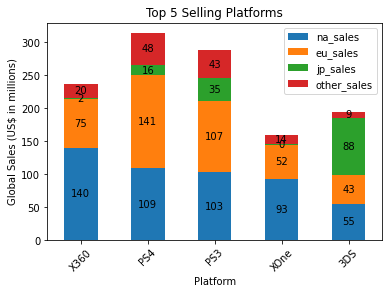

In [51]:
top_sales_by_platform(platform_sales['na_sales'])

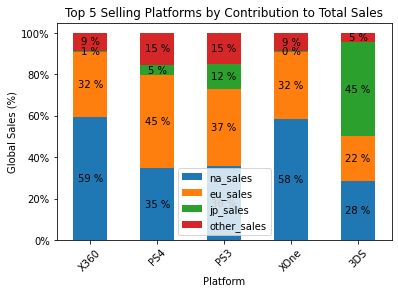

In [52]:
top_sales_by_platform_by_contribution(platform_sales['na_sales'])

<a id='4.4.1.2'><a/>
#### 4.4.1.2 Europe Sales by Platform
[Return to Table of Contents](#back)

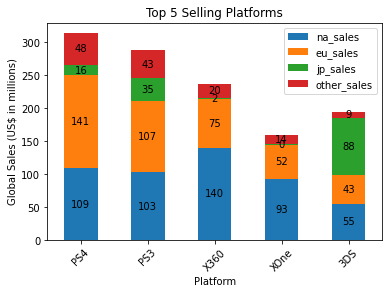

In [53]:
top_sales_by_platform(platform_sales['eu_sales'])

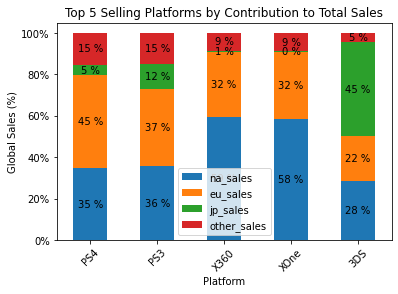

In [54]:
top_sales_by_platform_by_contribution(platform_sales['eu_sales'])

<a id='4.4.1.2'><a/>
#### 4.4.1.2 Japan Sales by Platform
[Return to Table of Contents](#back)

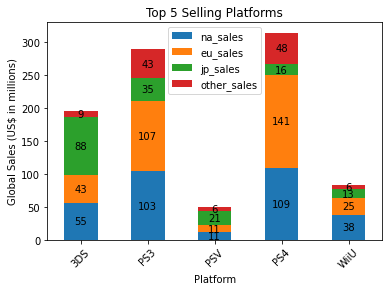

In [55]:
top_sales_by_platform(platform_sales['jp_sales'])

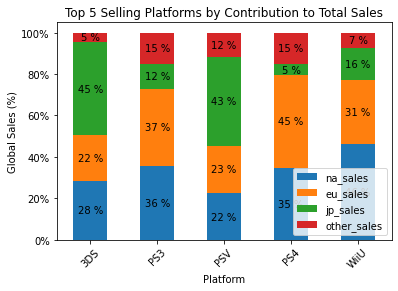

In [56]:
top_sales_by_platform_by_contribution(platform_sales['jp_sales'])

The top selling platforms (by gross sales) in NA was the X360, while the sales of this platform in other regions did not make a meaningful contribution to the sales percentage. In Europe the PS4 is the most popular platform and from where 45% of the platform's sales were derived. In Japan the 3DS is the most popular platform by gross sales and where the platform derives 45% of its global revenue. Notably, the PSV also sold better in Japan than in other regions by wide margins. This is worth nothing as they are both handheld devices (perhaps the Japanese prefer playing on the go). In terms of unpopular platforms, it is notable how poorly the X360 and XOne, American platforms, sell in Japan versus the other platforms.

<a id='4.4.2'><a/>
### 4.4.2 Regional Sales by Genre
[Return to Table of Contents](#back)

In [57]:
genre_sales = df.groupby('genre')[['na_sales','eu_sales','jp_sales','other_sales']].sum()

In [58]:
def top_sales_by_genre(x):
    ax = genre_sales.loc[x.nlargest(5).index].plot(kind='bar', stacked=True)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.0f}'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')

    plt.title('Top 5 Selling Genres')
    plt.xlabel('Genre')
    plt.xticks(rotation=45)
    plt.ylabel('Global Sales (US$ in millions)')

    plt.show()

In [59]:
def top_sales_by_genre_by_contribution(x):
    ax = (((genre_sales.divide(genre_sales.sum(1),0)).loc[x.nlargest(5).index]*100)
         .plot(kind='bar', stacked=True))
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.0f} %'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center',)

    plt.title('Top 5 Selling Platforms by Genre Contribution to Total Sales')
    plt.xlabel('Platform')
    plt.xticks(rotation=45)
    plt.ylabel('Global Sales (%)')
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

    plt.show()

<a id='4.4.2.1'><a/>
#### 4.4.2.1 North American Sales by Genre
[Return to Table of Contents](#back)

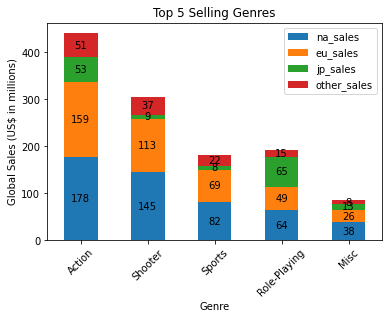

In [60]:
top_sales_by_genre(genre_sales['na_sales'])

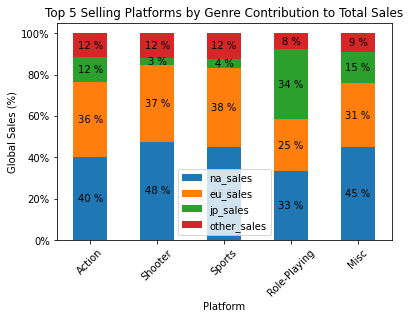

In [61]:
top_sales_by_genre_by_contribution(genre_sales['na_sales'])

<a id='4.4.2.2'><a/>
#### 4.4.2.2 Europe Sales by Genre
[Return to Table of Contents](#back)

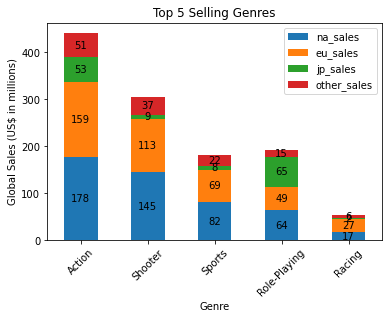

In [62]:
top_sales_by_genre(genre_sales['eu_sales'])

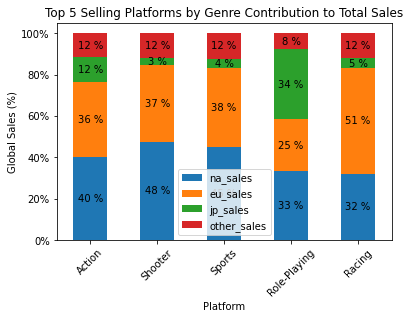

In [63]:
top_sales_by_genre_by_contribution(genre_sales['eu_sales'])

<a id='4.4.2.3'><a/>
#### 4.4.2.3 Japan Sales by Genre
[Return to Table of Contents](#back)

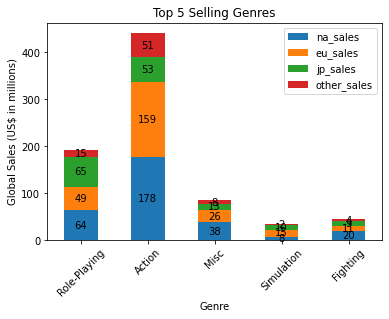

In [64]:
top_sales_by_genre(genre_sales['jp_sales'])

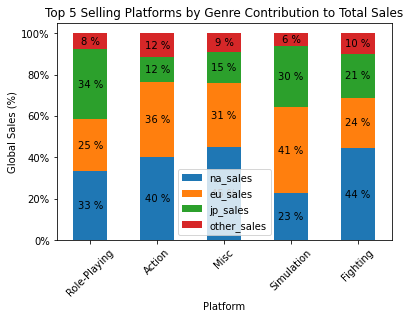

In [65]:
top_sales_by_genre_by_contribution(genre_sales['jp_sales'])

For the top five selling platforms, average sales as a percentage are broken down with North America comprising 46%, European Union comprising 35% and Japan comprising 19%. In North America shooter, sports and miscellaneous games are the most popular while in Europe, the most popular games are action, shooter and sports (in this order). For both regions, role-playing is the least favorite, experiencing a significant drop off from the averages. In Japan, we see the exact opposite: role-playing games are twice as popular as the average.  

<a id='4.4.3'><a/>
### 4.4.3 Regional Sales by ESRB
[Return to Table of Contents](#back)

In [66]:
rating_sales = df.groupby('rating')[['na_sales','eu_sales','jp_sales','other_sales']].sum()

In [67]:
def top_sales_by_rating(x):
    ax = (rating_sales.loc[x.nlargest(5).index].plot(kind='bar', stacked=True))
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.0f}'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center',)

    plt.title('Top 5 Selling Ratings')
    plt.xlabel('Rating')
    plt.xticks(rotation=45)
    plt.ylabel('Global Sales (US$ in millions)')

    plt.show()

In [68]:
def top_sales_by_rating_by_contribution(x):
    ax = (((rating_sales.divide(rating_sales.sum(1),0)).loc[x.nlargest(5).index]*100)
         .plot(kind='bar', stacked=True))
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.0f} %'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center',)

    plt.title('Top 5 Selling Platforms by Rating Contribution to Total Sales')
    plt.xlabel('Platform')
    plt.xticks(rotation=45)
    plt.ylabel('Global Sales (%)')
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())

    plt.show()

<a id='4.4.3.1'><a/>
#### 4.4.3.1 North American Sales by Rating
[Return to Table of Contents](#back)

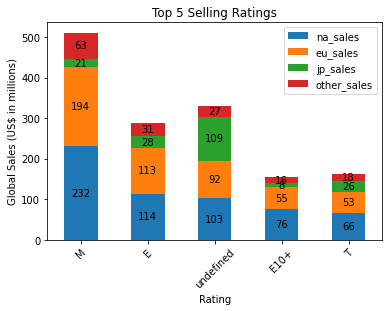

In [69]:
top_sales_by_rating(rating_sales['na_sales'])

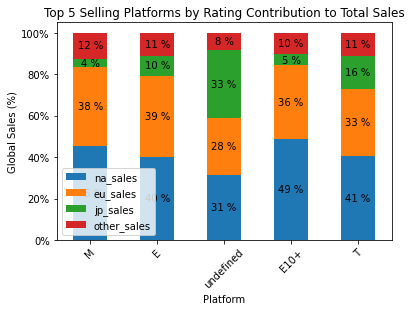

In [70]:
top_sales_by_rating_by_contribution(rating_sales['na_sales'])

<a id='4.4.3.2'><a/>
#### 4.4.3.2 European Sales by Rating
[Return to Table of Contents](#back)

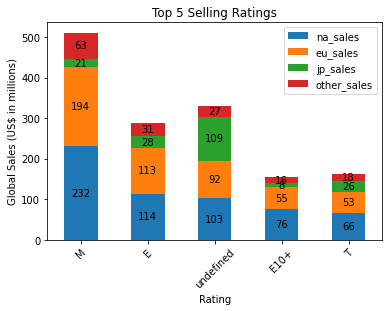

In [71]:
top_sales_by_rating(rating_sales['eu_sales'])

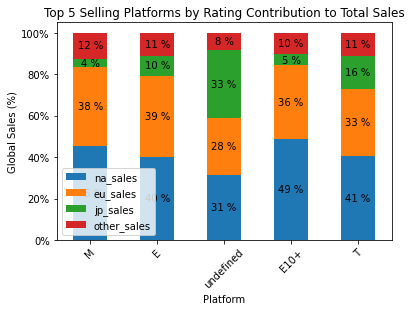

In [72]:
top_sales_by_rating_by_contribution(rating_sales['eu_sales'])

<a id='4.4.3.2'><a/>
#### 4.4.3.2 Japan Sales by Rating
[Return to Table of Contents](#back)

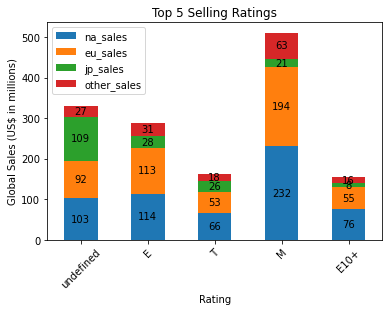

In [73]:
top_sales_by_rating(rating_sales['jp_sales'])

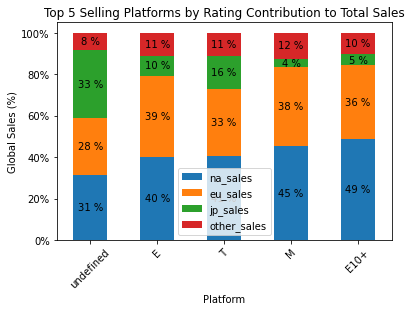

In [74]:
top_sales_by_rating_by_contribution(rating_sales['jp_sales'])

For the top five selling platforms, average sales as a percentage are broken down with North America comprising 41%, European Union comprising 35% and Japan comprising 14%. In North America the ratings that outperfom the average are M and E10+ and Europe has similar results, with the top two outperforming the average being E and M. In Japan, games that we classified as "undefined" were the most popular. We did see early that most of the missing values (which we converted to "undefinied" fell into the 'role playing' and platform genres, which would allow us to conclude that the Japane "undefined" games are probably E or E10+ games. 

<a id='4.5'><a/>
## 4.5 Critic and User Scores Impact on Game Sales
[Return to Table of Contents](#back)

Using PS4, PS3, and X360 (the top three selling games in 2016), we will examine how user and professional reviews affect sales.

In [75]:
df[df.platform=='PS4'].corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,-0.029672,0.127803,-0.235032
na_sales,-0.248961,1.000000,0.785362,0.472981,0.944259,0.399175,-0.009058,0.928160
eu_sales,-0.208306,0.785362,1.000000,0.464563,0.944698,0.333797,-0.043862,0.958157
jp_sales,-0.060993,0.472981,0.464563,1.000000,0.496467,0.304549,0.166377,0.527129
other_sales,-0.234796,0.944259,0.944698,0.496467,1.000000,0.393276,-0.026206,0.998051
critic_score,-0.029672,0.399175,0.333797,0.304549,0.393276,1.000000,0.553484,0.390466
user_score,0.127803,-0.009058,-0.043862,0.166377,-0.026206,0.553484,1.000000,-0.023815
total_sales,-0.235032,0.928160,0.958157,0.527129,0.998051,0.390466,-0.023815,1.000000


In [76]:
df[df.platform=='PS3'].corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.174893,-0.126485,-0.132418,-0.141873,-0.029014,-0.234619,-0.157746
na_sales,-0.174893,1.000000,0.842724,0.370904,0.896182,0.308325,-0.006902,0.939310
eu_sales,-0.126485,0.842724,1.000000,0.382929,0.981766,0.274883,-0.015347,0.970812
jp_sales,-0.132418,0.370904,0.382929,1.000000,0.393358,0.181328,0.189548,0.464295
other_sales,-0.141873,0.896182,0.981766,0.393358,1.000000,0.282729,0.007130,0.985992
critic_score,-0.029014,0.308325,0.274883,0.181328,0.282729,1.000000,0.414186,0.302526
user_score,-0.234619,-0.006902,-0.015347,0.189548,0.007130,0.414186,1.000000,0.007210
total_sales,-0.157746,0.939310,0.970812,0.464295,0.985992,0.302526,0.007210,1.000000


In [77]:
df[df.platform=='X360'].corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.145209,-0.145637,-0.324916,-0.141863,-0.018929,-0.227807,-0.151962
na_sales,-0.145209,1.000000,0.838446,0.524716,0.965031,0.304495,-0.001549,0.979361
eu_sales,-0.145637,0.838446,1.000000,0.526260,0.943203,0.307348,0.015737,0.931175
jp_sales,-0.324916,0.524716,0.526260,1.000000,0.540190,0.178271,0.093671,0.550276
other_sales,-0.141863,0.965031,0.943203,0.540190,1.000000,0.322657,0.001001,0.995453
critic_score,-0.018929,0.304495,0.307348,0.178271,0.322657,1.000000,0.389859,0.319023
user_score,-0.227807,-0.001549,0.015737,0.093671,0.001001,0.389859,1.000000,0.005040
total_sales,-0.151962,0.979361,0.931175,0.550276,0.995453,0.319023,0.005040,1.000000


<a id='4.5.1'><a/>
### 4.5.1 Critic Scores Impact
[Return to Table of Contents](#back)

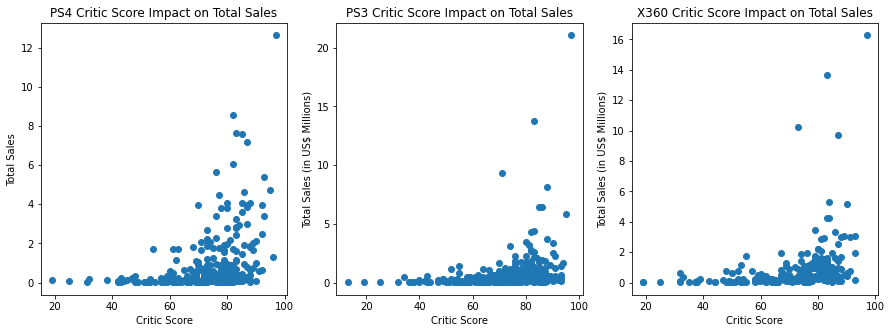

In [78]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].scatter(df[df.platform=='PS4']['critic_score'],df[df.platform=='PS4']['total_sales']) 
axs[0].set_title('PS4 Critic Score Impact on Total Sales')
axs[0].set_xlabel('Critic Score')
axs[0].set_ylabel('Total Sales')

axs[1].scatter(df[df.platform=='PS3']['critic_score'],df[df.platform=='PS3']['total_sales']) 
axs[1].set_title('PS3 Critic Score Impact on Total Sales')
axs[1].set_xlabel('Critic Score')
axs[1].set_ylabel('Total Sales (in US$ Millions)')

axs[2].scatter(df[df.platform=='X360']['critic_score'],df[df.platform=='X360']['total_sales']) 
axs[2].set_title('X360 Critic Score Impact on Total Sales')
axs[2].set_xlabel('Critic Score')
axs[2].set_ylabel('Total Sales (in US$ Millions)')

plt.show()

<a id='4.5.2'><a/>
### 4.5.2 User Scores Impact
[Return to Table of Contents](#back)

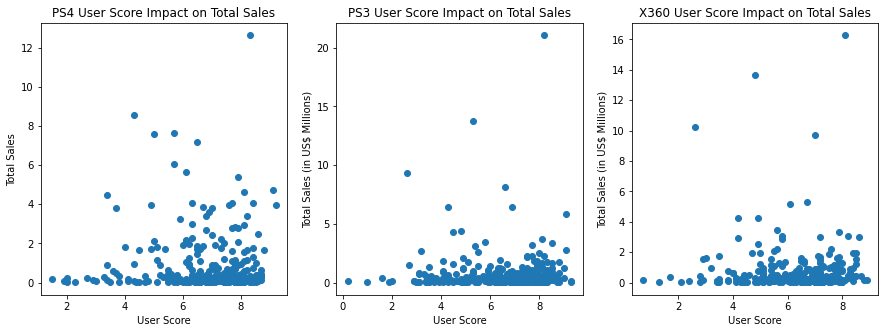

In [79]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].scatter(df[df.platform=='PS4']['user_score'],df[df.platform=='PS4']['total_sales']) 
axs[0].set_title('PS4 User Score Impact on Total Sales')
axs[0].set_xlabel('User Score')
axs[0].set_ylabel('Total Sales')

axs[1].scatter(df[df.platform=='PS3']['user_score'],df[df.platform=='PS3']['total_sales']) 
axs[1].set_title('PS3 User Score Impact on Total Sales')
axs[1].set_xlabel('User Score')
axs[1].set_ylabel('Total Sales (in US$ Millions)')

axs[2].scatter(df[df.platform=='X360']['user_score'],df[df.platform=='X360']['total_sales']) 
axs[2].set_title('X360 User Score Impact on Total Sales')
axs[2].set_xlabel('User Score')
axs[2].set_ylabel('Total Sales (in US$ Millions)')

plt.show()

User_score does not have an impact on sales, but critic_score does have a positive correlation with total sales (though less so with the X360), indicating that in general, a higher critic score would increase sales.

<a id='4.6'><a/>
## 4.6 Conclusion
[Return to Table of Contents](#back)

With game sales starting in 1980, the industry began to take off in the early 1990s with three points of acceleration: 1993, 2000 and 2004. Since the 2004 peak, game sales have been falling year over year, with a slight positive blip in 2015. The 2016 leaders in total sales were: 1) PS4 (69.25 million) 2) XOne (26.15 million) 3) 3DS (15.14 million). 

Platforms have a shelf life of 11-12 years, with rapid, almost vertical growth in the first 2-3 years, before experiencing falling growth year-over-year. Games on consoles outperform those handheld devices and desktops.

Games are sold on a variety of platforms, but if found on the most popular platforms, they tend to not be as widely available across platforms. The most profitable genres (based on average global sales and not taking into account regional difference) are Shooter, followed by Action, Fighting, Racing and Sports. The genres with lower sales are Adventure, Puzzle and Strategy.

From a regional perspective, in North America, the X360 and XOne are significantly  more popular (i.e. exceeding the average), while in Europe the PS4 is more popular. In Japan, the 3DS is the most popular. In North America and Europe, shooter games are the most popular with role-playing being the least. In Japan, we see the exact opposite: role-playing games are twice as popular as the average of all other genres. In North America the ratings that outperfom the average are M and E10+ and Europe has similar results, with the top two outperforming the average being E and M. In Japan, games that we classified as "undefined" were the most popular. We did see early in our ananlysis that most of the missing values (which we converted to "undefined") fell into the 'role playing' and platform genres, which would allow us to conclude that the Japane "undefined" games are probably E or E10+ games.

User_score does not have an impact on sales, but critic_score does have a positive correlation with total sales, indicating the a higher critic score would increase sales. This is likely because potential buyers read user scores before purchasing.

<a id='5'><a/>
# 5 Hypothesis Testing
[Return to Table of Contents](#back)

Ice management has asked that we perform two tests:
<ul>
 <li>Test 1: Average user ratings of the Xbox One and PC platforms are the same</li>
 <li>Test 2: Average user ratings for the Action and Sports genres are different</li>
 </ul>
 
To perform these tests, we will need to utilize samples taken from these two statistical populations.

<a id='5.1'><a/>
## 5.1 Average User Ratings for Two Popular Platforms
[Return to Table of Contents](#back)

<a id='5.1.1'><a/>
### 5.1.1 Initial Statistical Review
[Return to Table of Contents](#back)

In [80]:
df.groupby('platform')['user_score'].describe().filter(items=['PS4','XOne'], axis=0)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
PS4,289.0,6.803806,1.457721,1.5,6.2,7.1,7.9,9.2
XOne,205.0,6.597561,1.380837,1.6,5.8,6.8,7.7,9.2


With similar sample sizes, PS4 has a higher average rating and standard deviation than XOne, though not by much. Based on this above, we can probably conclude that user ratings are equal for these platforms, but a t-test will help to confirm this.

<a id='5.1.2'><a/>
### 5.1.2 Assumptions Review
[Return to Table of Contents](#back)

Definitions:

<ul>
 <li>H0 (null hypothesis): average user ratings for PS4 = average user ratings for XOne </li>
 <li>H1 (alternative hypothesis): average user ratings for PS4 <> average user ratings for XOne </li>
 <li>Alpha: 0.05 (typical) </li>
 </ul>
 
If p_value < alpha, reject the null hypothesis. If p_value > alpha, fail to reject the null hypothesis.

<a id='5.1.3'><a/>
### 5.1.3 Hypothesis Test
[Return to Table of Contents](#back)

In [81]:
# before testing hypothesis with T-test, we must check sample variance for homogeneity

stat, p = levene(df[df.platform=='PS4'].user_score.dropna(),df[df.platform=='XOne'].user_score.dropna())
p

0.7297318239368118

The p-value (i.e. > 0.05) suggests that the populations do have equal variances.

In [82]:
st.ttest_ind(df[df.platform=='PS4'].user_score.dropna(), df[df.platform=='XOne'].user_score.dropna())

Ttest_indResult(statistic=1.5835132487323913, pvalue=0.11394707989843632)

The p_value > 0.05 and thus we fail to reject the null hypothesis of equal averages. There may not be a statistical difference between the user scores of  PS4 and XOne, which is what we expected based on our initital statistical review. 

<a id='5.2'><a/>
## 5.2 Average User Ratings for Two Popular Genres
[Return to Table of Contents](#back)

<a id='5.2.1'><a/>
### 5.2.1 Initial Statistical Review
[Return to Table of Contents](#back)

In [83]:
df.groupby('genre').user_score.describe().filter(items=['Action','Sports'], axis=0)

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,596.0,6.845302,1.381545,1.6,6.3,7.2,7.8,9.3
Sports,221.0,5.410407,1.730851,0.2,4.2,5.7,6.7,8.8


Action has a higher average rating than sports, but a lower standard deviation. It's also important to note that the sample size for Action is almost twice as large as that of Sports. As such, a t-test is needed to confirm the statistical significance. 

<a id='5.2.2'><a/>
### 5.2.2 Assumptions Review
[Return to Table of Contents](#back)

Definitions:

<ul>
 <li>H0 (null hypothesis): average user ratings for Action = average user ratings for Sports </li>
 <li>H1 (alternative hypothesis): average user ratings for Action <> average user rating for Sports </li>
 <li>Alpha: 0.05 (typical) </li>
 </ul>
 
If p_value < alpha, reject the null hypothesis. If p_value > alpha, fail to reject the null hypothesis.

<a id='5.2.3'><a/>
### 5.2.3 Hypothesis Test
[Return to Table of Contents](#back)

In [84]:
# before testing hypothesis with T-test, we must check sample variance for homogeneity

stat, p = levene(df[df.genre=='Action'].user_score.dropna(),df[df.genre=='Sports'].user_score.dropna())
p

3.6532228966322106e-06

The p-value (i.e. < than 0.05) suggests that the populations do NOT have equal variances.

In [85]:
st.ttest_ind(df[df.genre=='Action'].user_score.dropna(), df[df.genre=='Sports'].user_score.dropna(), equal_var=False)

Ttest_indResult(statistic=11.084210290636742, pvalue=1.773015909026941e-24)

The p_value < 0.05 and thus we reject the null hypothesis of equal averages. There is a statistical difference between the user scores of Action and Sports, meaning that the average user ratings are not the same.

<a id='5.3'><a/>
## 5.3 Conclusion 
[Return to Table of Contents](#back)

Looking at the top two platforms by sales, user scores did not differ from one platform to the next. However, when we tested two popular genres, we saw that there was a statistical difference between their user scores. 

<a id='6'><a/>
# 6 General Conclusion
[Return to Table of Contents](#back)

**Data Processing**

We were provided with one file for this analysis. The data was generally clean (i.e. no duplicates, not many data type or formatting changes) so preprocessing was minimal in that regard. It is however important to note that there were a significant number of missing values in the series 'critic_score', 'user_score', and 'rating'. Most of this we were not able to fill in without compromising the integrity of the data. 

**Exploratory Data Analysis**

With game sales starting in 1980, the industry began to take off in the early 1990s with three points of acceleration: 1993, 2000 and 2004. Since the 2004 peak, game sales have been falling year over year, with a slight positive blip in 2015. The 2016 leaders in total sales were: 1) PS4 (69.25 million) 2) XOne (26.15 million) 3) 3DS (15.14 million). 

Platforms have a shelf life of 11-12 years, with rapid, almost vertical growth in the first 2-3 years, before experiencing falling growth year-over-year. Games on consoles outperform those handheld devices and desktops.

Games are sold on a variety of platforms, but if found on the most popular platforms, they tend to not be as widely available across platforms. The most profitable genres (based on average global sales and not taking into account regional difference) are Shooter, followed by Action, Fighting, Racing and Sports. The genres with lower sales are Adventure, Puzzle and Strategy.

From a regional perspective, in North America, the X360 and XOne are significantly  more popular (i.e. exceeding the average), while in Europe the PS4 is more popular. In Japan, the 3DS is the most popular. In North America and Europe, shooter games are the most popular with role-playing being the least. In Japan, we see the exact opposite: role-playing games are twice as popular as the average of all other genres. In North America the ratings that outperfom the average are M and E10+ and Europe has similar results, with the top two outperforming the average being E and M. In Japan, games that we classified as "undefined" were the most popular. We did see early in our study that most of the missing values (which we converted to "undefinied") fell into the 'role playing' and platform genres, which would allow us to conclude that the Japane "undefined" games are probably E or E10+ games.

User_score does not have an impact on sales, but critic_score does have a positive correlation with total sales, indicating the a higher critic score would increase sales. This is likely because potential buyers read user scores before purchasing.

**Hypothesis Testing**

For this analysis, we were asked to first compare the average user ratings for two popular platforms (PS4 and XOne) and then to compare average user ratings for two popular genres (Action and Sports). For the first test, we concluded that user scores did not differ from one platform to the next. However, for the second test, when we tested two popular genres, we saw that there was a statistical difference between their user scores. 

**Recommendations to Management for 2017 Advertising Campaign**

Several conclusions can be drawn from the analysis that should be considered in 2017 planning:
<ul>
    <li>North American makes up more than 50% of sales, Europe about 30% and Japan and other the rest. Advertising campaign dollars should be distributed proportionately.
    <li>Regional variation is significant and cannot be ignored. The advertising campaigns must be tailored to the user preferences in different regions.
    <li>Platforms have short life spans, with most sales happening in the early years. Efforts should be focused on games for newer platforms, which according to 2016 data, the newest would be the PS4. Notably, Japan has a higher preference for handheld devices and Japanese platforms so games on those should be taken into account.
    <li>There are clear preferences for games that have movement (Shooter, Action, Racing, Sports in North America and Europe. In Japan, we see the exact opposite: role-playing games are twice as popular as the average of all other genres.
    <li> Ratings (which is almost a proxy for genre) did not have a strong correlation to sales while critic scores did. We should focus more on pushing games with high critic scores versus ratings or even user scores (which also did not have a strong correlation to sales) 